In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import product
from sklearn.linear_model import LinearRegression 

%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

DATA_DIR = Path('../data')

# Load Siju Data

In [6]:
sdf = pd.read_pickle(DATA_DIR /'siju-cleaned-expanded-pivot.pkl')

s_shape = sdf.shape
print(f'Dataframe shape: {s_shape}')
print(f'Number of experiments: {s_shape[0]}')

sdf.head()

Dataframe shape: (90, 16)
Number of experiments: 90


stimulus  DAN dF/F                      \
lobe                                              alpha'1   alpha'2   alpha'3   
id                                                                              
TH-58E02_090816_Citronella           citronella  0.476658  0.412485  0.226218   
TH-58E02_170816_Citronella           citronella  0.432107  0.527736  0.175783   
181022_TH58E02G6f_ST00_0_Citronella  citronella  0.423704  0.083843  0.379430   
171016_Citronella 2                  citronella  0.610923  0.427451 -0.009572   
171016_Citronella 1                  citronella  0.671743  0.539444  2.572961   

                                                                             \
lobe                                   alpha1    alpha2    alpha3    beta'1   
id                                                                            
TH-58E02_090816_Citronella           0.341723  0.230774  1.023435  0.586997   
TH-58E02_170816_Citronella           0.034967  0.245432  0.371485  0.457447   
181022_TH58E02G6f_ST00_0_Citronella -0.011456  0.097590  0.640199  0.695688   
171016_Citronella 2                  0.135995  0.637080  0.009996  0.079676   
171016_Citronella 1                  0.102841  0.927985  0.578673  0.682591   

                                                                             \
lobe                                   beta'2     beta1     beta2    gamma1   
id                                                                            
TH-58E02_090816_Citronella           0.837626  0.624777  0.990563  0.051930   
TH-58E02_170816_Citronella           0.520961  0.281905  0.639173  0.047926   
181022_TH58E02G6f_ST00_0_Citronella  0.670628  0.269143  0.506330  0.251025   
171016_Citronella 2                  0.021876 -0.013304 -0.007225 -0.015125   
171016_Citronella 1                  0.582773  0.211340  0.530082  0.377056   

                                                                             
lobe                                   gamma2    gamma3    gamma4    gamma5  
id                                                                           
TH-58E02_090816_Citronella           0.292853  0.707377  0.790165  0.337667  
TH-58E02_170816_Citronella           0.671082  0.632577  0.304596  0.075477  
181022_TH58E02G6f_ST00_0_Citronella  0.406841  1.010089  0.882712  0.095707  
171016_Citronella 2                  0.128165  0.039962  0.047961  0.020380  
171016_Citronella 1                  0.601208  0.659796  0.434064  0.096403

# Load Hije Data

In [7]:
hdf = pd.read_pickle(DATA_DIR /'hije-cleaned-expanded-pivot.pkl')
hdf = hdf[['stimulus', 'MBON dF/F']]

h_shape = hdf.shape
print(f'Dataframe shape: {h_shape}')
print(f'Number of experiments: {h_shape[0]}')

hdf.head()

Dataframe shape: (45, 16)
Number of experiments: 45


stimulus  MBON dF/F                                   \
lobe                           alpha'1    alpha'2    alpha'3     alpha1   
id                                                                        
2-heptanone_fly0  heptanone  57.014634  53.449785  14.488461  31.733999   
2-heptanone_fly1  heptanone  44.168362  91.255851  17.765559  29.395413   
2-heptanone_fly2  heptanone  30.958356  67.175713  19.834570  25.548454   
2-heptanone_fly3  heptanone  36.248176  50.087333  18.659880  21.263302   
2-heptanone_fly4  heptanone  14.150340  21.817438  11.888643  18.037705   

                                                                         \
lobe                 alpha2     alpha3     beta'1     beta'2      beta1   
id                                                                        
2-heptanone_fly0  35.150185  50.098322  29.570272  25.684328  34.010916   
2-heptanone_fly1  28.380873  21.858113  24.830531  16.444911  43.192486   
2-heptanone_fly2  31.033140  79.720826  25.744823  17.759295  46.527031   
2-heptanone_fly3  20.912131  44.043983  38.035029  10.343638  26.904135   
2-heptanone_fly4  17.063540  22.347819  24.288879   5.184545  14.825427   

                                                                         \
lobe                  beta2     gamma1     gamma2     gamma3     gamma4   
id                                                                        
2-heptanone_fly0  11.951235  46.239205  66.086409  42.144978  60.102633   
2-heptanone_fly1  27.904354  53.975628  37.821266  47.514654  52.499951   
2-heptanone_fly2  22.010365  28.879761  29.721496  39.124175  45.002144   
2-heptanone_fly3   5.369238  41.142201  31.954230  70.776622  39.891746   
2-heptanone_fly4   9.185952  11.818865  12.767847  37.395544  31.264467   

                             
lobe                 gamma5  
id                           
2-heptanone_fly0  11.447692  
2-heptanone_fly1   3.998101  
2-heptanone_fly2   1.734179  
2-heptanone_fly3   0.429397  
2-heptanone_fly4  -2.034475

# Create 'Joining Table'

In [8]:
# Get Stimuli
stimuli = hdf.stimulus.unique()

print(stimuli)

print(sdf.stimulus.unique())


['heptanone' 'citronella' 'ethanol' 'hexanol' 'mch' 'octanol' 'peppermint'
 'vinegar' 'yeast']
['citronella' 'ethanol' 'heptanone' 'hexanol' 'mch' 'octanol' 'peppermint'
 'vinegar' 'yeast']


In [13]:
# Using the the unique row indices, create a 'joining table' containing all possible combinations
# of DAN-MBON data points for each of the odors. This is neccesary since the flies used to get the DAN
# data were different to those used for the MBON data.

join_tab = []
datum_per_stim = []

for stim in stimuli:
    sdf_stim = sdf[sdf['stimulus'] == stim]
    hdf_stim = hdf[hdf['stimulus'] == stim]

    print(f'- {stim}')
    print(f'Shape of sdf: {sdf_stim.shape}')
    print(f'Shape of hdf: {hdf_stim.shape}')

    combinations = list(product(sdf_stim.index, hdf_stim.index))
    print(f'Number of combinations: {len(combinations)}')

    datum_per_stim.append(len(combinations))
    
    join_tab.extend(combinations)

print(f'\nAll possible combinations: {len(join_tab)}')

- heptanone
Shape of sdf: (9, 16)
Shape of hdf: (5, 16)
Number of combinations: 45
- citronella
Shape of sdf: (11, 16)
Shape of hdf: (5, 16)
Number of combinations: 55
- ethanol
Shape of sdf: (6, 16)
Shape of hdf: (5, 16)
Number of combinations: 30
- hexanol
Shape of sdf: (8, 16)
Shape of hdf: (5, 16)
Number of combinations: 40
- mch
Shape of sdf: (11, 16)
Shape of hdf: (5, 16)
Number of combinations: 55
- octanol
Shape of sdf: (8, 16)
Shape of hdf: (5, 16)
Number of combinations: 40
- peppermint
Shape of sdf: (12, 16)
Shape of hdf: (5, 16)
Number of combinations: 60
- vinegar
Shape of sdf: (11, 16)
Shape of hdf: (5, 16)
Number of combinations: 55
- yeast
Shape of sdf: (14, 16)
Shape of hdf: (5, 16)
Number of combinations: 70

All possible combinations: 450


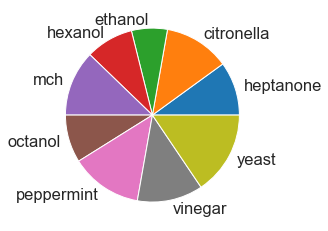

In [17]:
# Check that the dataset is relatively well balanced

plt.pie(datum_per_stim, labels=stimuli)
plt.show()

Each datapoint is now a tuple:
("DAN id", "MBON id")

In [20]:
# What does a data point now look like
i = 100
print(f'The {i}th data point looks like: {join_tab[i]}')

# Extract row of DAN data using id (ignore the first column which is the stimulus)
DAN_x = sdf.loc[join_tab[i][0]].values[1:]
print(f'\nThe DAN data with id {join_tab[i][0]} is:\n{DAN_x}')

MBON_y = hdf.loc[join_tab[i][1]].values[1:]
print(f'\nThe MBON data with id {join_tab[i][1]} is:\n{MBON_y}')

The 100th data point looks like: ('181214a_TH58E02G6f_ST00_1_Ethanol', 'ethanol_fly0')

The DAN data with id 181214a_TH58E02G6f_ST00_1_Ethanol is:
[0.2195584235860149 0.2294227266991938 1.8297317270905022 0.28516870958161
 0.3021907647065587 0.43358365464528753 2.0095193813803194
 0.5191058720435044 0.29907913832380467 0.7371017931489893
 0.28535458760703214 0.5301529346261852 0.8566485985831983
 0.6035951332534931 0.05251213612245484]

The MBON data with id ethanol_fly0 is:
[40.10214899939467 25.657453562824543 17.4808562879505 20.465026081514782
 9.073939653716906 45.5018239869886 22.746210967683105 13.711930953905817
 20.375914737353458 20.922901146974205 43.47091272065403
 44.156373943023326 20.59049078092252 25.409393203596448
 1.5976875303586093]


## Build Data Matrices from Joining Table

In [21]:
def normalise(A: np.ndarray)->np.ndarray:
    mini = A.min()
    maxi = A.max()
    
    if mini < 0:
        return (A - mini)/(maxi - mini)
    
    return A/maxi

In [36]:
X = np.zeros([len(join_tab), 15])
Y = np.zeros([len(join_tab), 15])

for i, idx_pair in enumerate(join_tab):
    X[i, :] = sdf.loc[idx_pair[0]].values[1:]
    Y[i, :] = hdf.loc[idx_pair[1]].values[1:]

In [37]:
X_n = normalise(X)
Y_n = normalise(Y)

### Linear fit for each of the lobes

In [50]:
# Fit each of the lobes seperately
models = []
scores = []

for i in range(15):
    y = Y_n[:,i]
    model = LinearRegression(fit_intercept=True).fit(X_n, y)
    score = model.score(X_n, y)
    print(score)

    models.append(model)
    scores.append(score)

print(f'Average score: {sum(scores)/len(scores)}')

0.18913599162296668
0.08440870097362196
0.11618833154139163
0.1030478064335032
0.11311468453125162
0.10308380199855471
0.2545386058497583
0.05683757503677822
0.10179567581907267
0.07110302239757804
0.1731306313124622
0.177073644732755
0.1365399803477796
0.18921651582916044
0.11274735267578362
Average score: 0.13213082140682786


In [53]:
# Fit them all at the same time (should get the same result)
big_model = LinearRegression(fit_intercept=True).fit(X_n, Y_n)

print(big_model.score(X_n, Y_n))

0.13213082140682805
